<a href="https://colab.research.google.com/github/quicksilverri/statistics/blob/main/sklearn_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install --upgrade scikit-learn==0.23.0

In [4]:
from sklearn.datasets import load_boston 
import pandas as pd

In [3]:
X, y = load_boston(return_X_y=True)

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [13]:
kn_m = KNeighborsRegressor()

In [14]:
lr_m = LinearRegression()

In [15]:
kn_m.fit(X, y)

KNeighborsRegressor()

In [16]:
lr_m.fit(X, y)

LinearRegression()

In [17]:
import matplotlib.pylab as plt

In [18]:
pred = kn_m.predict(X)

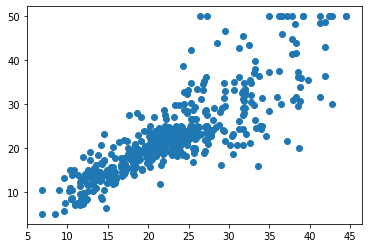

In [19]:
plt.scatter(pred, y)

In [20]:
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline

In [22]:
mod = KNeighborsRegressor().fit(X, y)

pipe = Pipeline([
    ('scale', StandardScaler()), 
    ('model', KNeighborsRegressor())
])

In [23]:
pipe.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsRegressor())])

In [24]:
pred = pipe.predict(X)

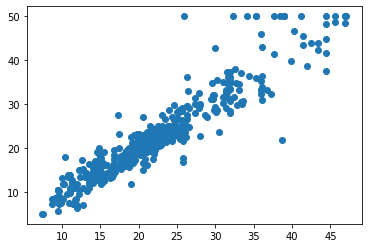

In [25]:
plt.scatter(pred, y)

In [29]:
lr_pipe = Pipeline([
                    ('scale', StandardScaler()), 
                    ('model', LinearRegression())
])

In [30]:
lr_pipe.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [31]:
pred_lr = lr_pipe.predict(X)

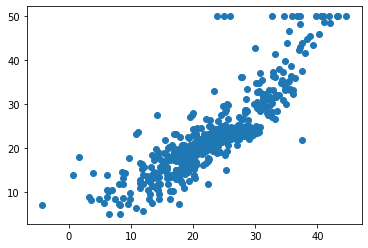

In [32]:
plt.scatter(pred_lr, y)

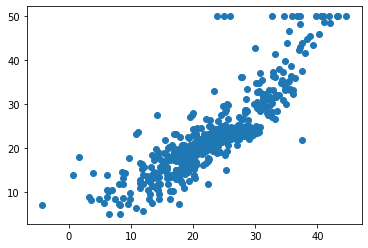

In [33]:
lr = LinearRegression()
lr.fit(X, y)
pred_lr = lr.predict(X)
plt.scatter(pred_lr, y)

scaling doesnt really effects LR